### I. Importing needed libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")

### II. Analyzing (and cleaning) the dataset

In [4]:
dataset = pd.read_csv("auto-mpg.data.csv")
dataset.head(10)

,"18.0 8 307.0 130.0 3504. 12.0 70 1 ""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...
6,14.0 8 440.0 215.0 4312. 8...
7,14.0 8 455.0 225.0 4425. 10...
8,15.0 8 390.0 190.0 3850. 8...
9,15.0 8 383.0 170.0 3563. 10...


In [5]:
# checking size and shape of the dataset
print("Dataset size: " + str(dataset.size))
print("Dataset shape: " + str(dataset.shape))

Dataset size: 397
Dataset shape: (397, 1)


As we see, there are three problems with this dataset:<br>
<ul>
    <li>1: the first row of the dataset had automatically become the column header of the dataset</li>
    <li>2: the entire dataset has around 8 attributes. but it's clear from the picture that the there is just one column </li>
    <li>3: proper column names is missing</li>
        

In [6]:
# making the column header as the first row, and splitting the attributes into respective columns
dataset = pd.read_csv("auto-mpg.data.csv", sep='\s+', header=None)
dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [7]:
# replacing column index with names
dataset.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model-year", "origin", "name"]
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [8]:
# checking size and shape of the dataset
print("Dataset size: " + str(dataset.size))
print("Dataset shape: " + str(dataset.shape))

Dataset size: 3582
Dataset shape: (398, 9)


All three problems are fixed :) <br>
<ul>
    <li>1: dataset has proper column header</li>
    <li>2: dataset has around 9 columns (~= attributes)</li>
    <li>3: proper column names</li>
        

##### Now  the dataset is shaped well in the outline (row and column index, shape, and column names), we should now have a quick look into the individual attributes (columns)

In [9]:
# checking for any null values 
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
origin          0
name            0
dtype: int64

In [10]:
# checking the datatype of the attributes
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model-year        int64
origin            int64
name             object
dtype: object

Every attribute is numerical except: "horsepower" and "name" which are objects. There is no need to make a modification on the "name" attribute" because we're anyways not using name as an attribute when we begin our modelling. So let's look at the 'horsepower' attribute:

In [11]:
# checking if 'horsepower' has any missing values
dataset["horsepower"].isnull().sum()

0

In [12]:
# check if 'horsepower' has any special characters (checking random segments)
print(dataset["horsepower"].values[0:40])
print("\n=================================")
print(dataset["horsepower"].values[100:140])
print("\n=================================")
print(dataset["horsepower"].values[300:340])

['130.0' '165.0' '150.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0'
 '190.0' '170.0' '160.0' '150.0' '225.0' '95.00' '95.00' '97.00' '85.00'
 '88.00' '46.00' '87.00' '90.00' '95.00' '113.0' '90.00' '215.0' '200.0'
 '210.0' '193.0' '88.00' '90.00' '95.00' '?' '100.0' '105.0' '100.0'
 '88.00' '100.0' '165.0' '175.0']

['88.00' '95.00' '46.00' '150.0' '167.0' '170.0' '180.0' '100.0' '88.00'
 '72.00' '94.00' '90.00' '85.00' '107.0' '90.00' '145.0' '230.0' '49.00'
 '75.00' '91.00' '112.0' '150.0' '110.0' '122.0' '180.0' '95.00' '?'
 '100.0' '100.0' '67.00' '80.00' '65.00' '75.00' '100.0' '110.0' '105.0'
 '140.0' '150.0' '150.0' '140.0']

['90.00' '70.00' '70.00' '65.00' '69.00' '90.00' '115.0' '115.0' '90.00'
 '76.00' '60.00' '70.00' '65.00' '90.00' '88.00' '90.00' '90.00' '78.00'
 '90.00' '75.00' '92.00' '75.00' '65.00' '105.0' '65.00' '48.00' '48.00'
 '67.00' '67.00' '67.00' '?' '67.00' '62.00' '132.0' '100.0' '88.00' '?'
 '72.00' '84.00' '84.00']


We can clearly see some "?" values in the 'horsepower' attribute. Filtering only those rows where 'horsepower' == '?'

In [13]:
dataset[dataset["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


Instead of removing, let us fix this through --> <strong>imputation</strong> (process of replacing missing data with substituted values). But since this attribute is mixed with values (that are not strings) we cannot impute it directly, and do a little pre-work as follows:

In [14]:
# splitting the dataset into two datasets: 
# ds_mark --> dataset that has "?" in horsepower attribute
# ds_wo_mark --> dataset without the ?" in horsepower attribute
ds_mark = dataset[dataset["horsepower"] == "?"]
ds_wo_mark = dataset[dataset["horsepower"] != "?"]

# BEFORE imputation
print("ds_mark dataset BEFORE imputation:")
ds_mark["horsepower"]

ds_mark dataset BEFORE imputation:


32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [15]:
# converting ds_wo_mark dataset to float type
ds_wo_mark.horsepower = ds_wo_mark.horsepower.astype(float)

# actual imputation:
# we are taking the mean value of the "horsepower" attribute and use it as a substitute 
# value to impute the "?" values
ds_wo_mean = ds_wo_mark.horsepower.mean()

# performing the imputation on ds_mark dataset
ds_mark["horsepower"] = ds_wo_mean

# AFTER imputation
print("ds_mark dataset AFTER imputation: ")
ds_mark["horsepower"]

ds_mark dataset AFTER imputation: 


32     104.469388
126    104.469388
330    104.469388
336    104.469388
354    104.469388
374    104.469388
Name: horsepower, dtype: float64

now we have imputated the 'horsepower' attributes, lets combine the two datasets to get our working dataframe (but with imputed values)

In [16]:
# concatenating the two dataframes into one
frames = [ds_wo_mark, ds_mark]
dataset = pd.concat(frames)

# verifying the shape again
dataset.shape

(398, 9)

if you quite didn't understand what we did above, this is what we did:

<img src="imputation_explained.png" style="width:500px;height:650px">

1. split the dataset into two sub-sets (one with "?" and one without "?")
2. calculate mean of ds_wo_mark["horsepower"]
3. impute ds_mark dataset's missing (or "?") values with the mean calculated above
4. concatenate both the datasets

In [17]:
# verifying if our "horsepower" problem has been fixed in the final dataset
dataset[dataset["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,name


In [18]:
# dtypes one final time 
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model-year        int64
origin            int64
name             object
dtype: object

In [19]:
# ignoring the 'name' attribute and finalizing the dataset
dataset = dataset.loc[:, dataset.columns != 'name']
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


### III. Visualizing the dataset

<strong>a. boxplot:</strong> first, we will start with a boxplot to understand the <strong>"distribution"</strong> of the variables in the dataset

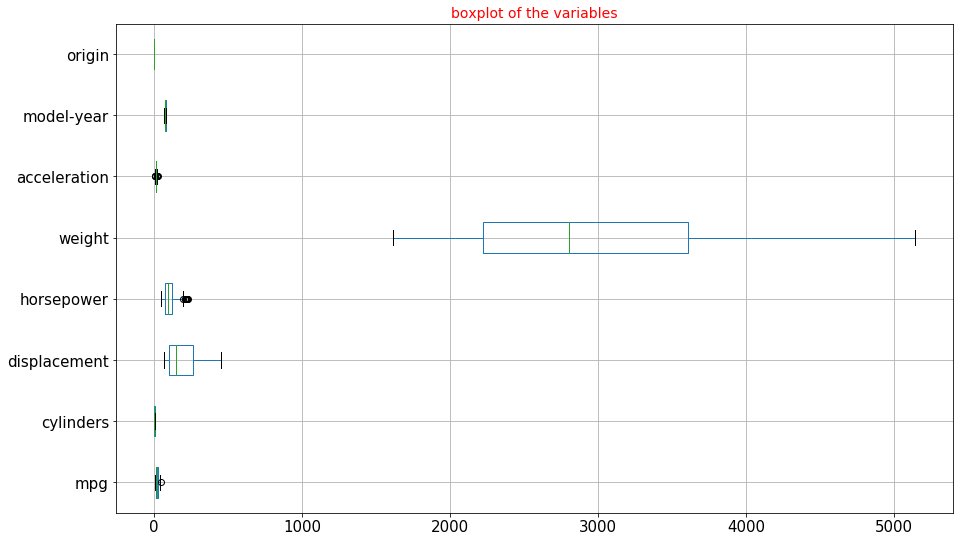

In [20]:
box = dataset.boxplot(column=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model-year",
                              "origin"], figsize=(15,9), fontsize=15, vert=False)
plt.title("boxplot of the variables", size=14, color='r')
plt.show()

<ul>
    <li>As we can see, only few variables are widely distributed, but other variables like "origin", "model-year", and "cylinders" are not distributed at all.</li> 
    <li>One more thing to observe is the "weight" variable which is very widely ditributed and in a different range compared to other variables. This might cause a problem when we develop our model (coz more weightage would be given to this variable). So, this is an useful indicator that shows we need to normalize the data</li>

<strong>b. histogram</strong>: this can help us further understand the distribution of each variable

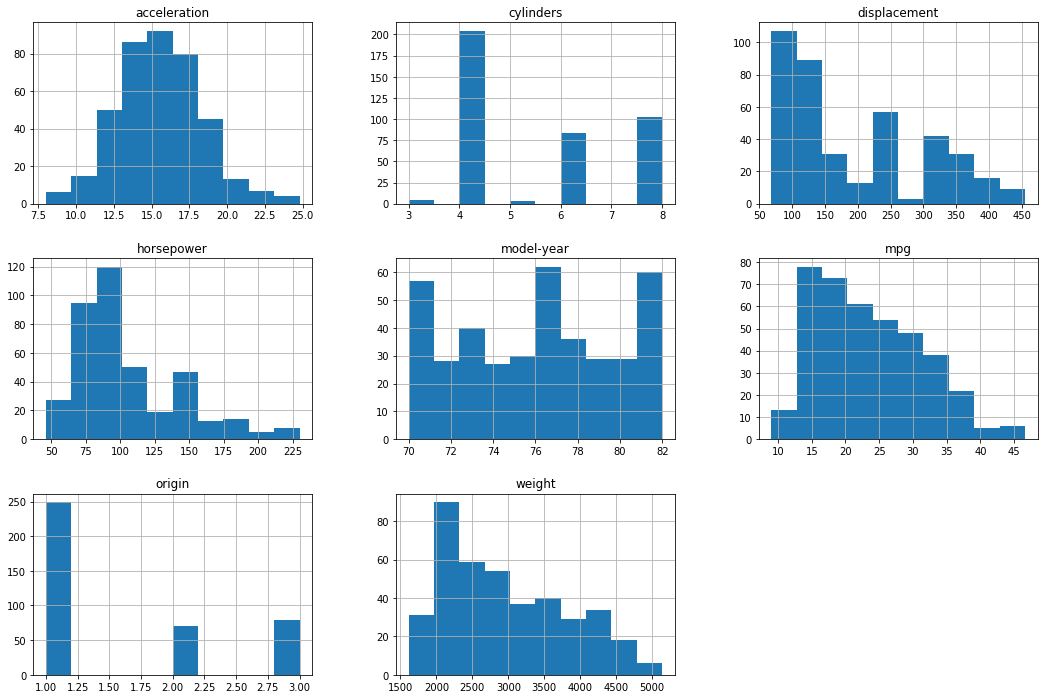

In [21]:
dataset.hist(grid=True, figsize=(18,12))
plt.show()

As we can see from the histograms, some variables have a clear gaussian (or normal) distribution while few have exponential, and few other kinds etc. 

<strong>c. scatter-matrix:</strong> A scatterplot helps us understand the relationship between two different variables. The scattermatrix is a collection of these scatterplots drawn for all variables of the dataset

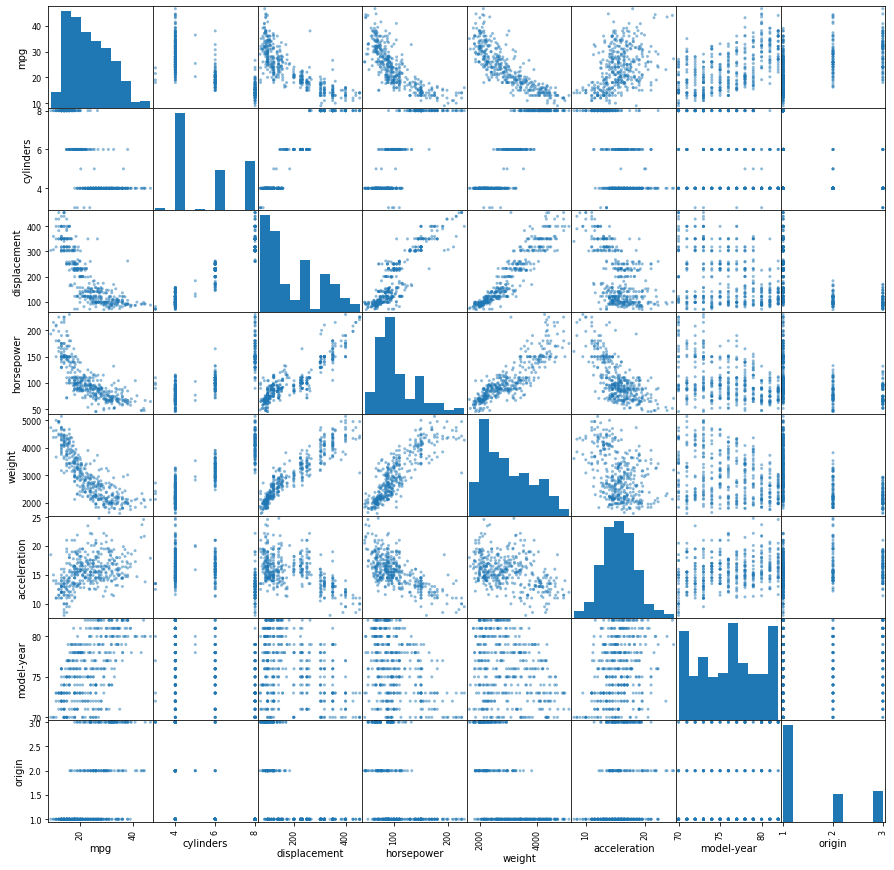

In [22]:
scatter_matrix(dataset, figsize=(15,15))
plt.show()

the diagonal box across this plot shows the historgrams of each of the variables. There are a couple of observations from the above scattermatrix:
<ul>
    <li><strong>relation between MPG (our "y") and other variables ("X")</strong>:</li>
    <ol>
        <li> "cylinders" and "origin" year doesn't impact "mpg" that much </li>
        <li> at a very low level, we can think of as the "model-year" increases, the "mpg" was better </li>
        <li> as the "displacement" decreases, "mpg" increases or the other way </li>
        <li> as the "horsepower" decreases, "mpg" increases or the other way </li>
        <li> as the "weight" decreases, "mpg" increases or less the weight more the mpg </li>
        <li> "acceleration" can be seen as proportional to "mpg", but it is not that intuitive to arrive at a quick conclusion</li> 
        

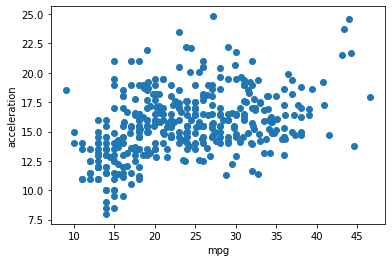

In [23]:
# scatterplot between 'mpg' and 'acceleration'
plt.scatter(dataset["mpg"], dataset["acceleration"])
plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.show()

Again, as we can see, the relationship between acceleration and mpg is not so clear to arrive at a conclusion.

### IV. Splitting the dataset into training and test set 

In [74]:
# assigning X and Y variables
# X will be the list of all independent variables like weight, horsepower etc.,
# y will be our dependent variable that we'd need to predict - 'mpg'
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, 0:1].values


# splitting the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nShape of training set:\nX_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("\nShape of test set:\nX_test: ", X_test.shape)
print("y_test: ", y_test.shape)


Shape of training set:
X_train:  (318, 7)
y_train:  (318, 1)

Shape of test set:
X_test:  (80, 7)
y_test:  (80, 1)


In [120]:
# quick peek into the independent variables
print("\nX_train :\n", X_train[:3])
print("\n----------\n\nX_test: \n", X_test[:3])


X_train :
 [[ 1.50731608  1.53390885  1.27909345  1.36269046 -0.93413974 -1.13742537
  -0.73440682]
 [-0.85389827 -0.98836243 -0.91404371 -1.20222815  1.82353234 -1.41248337
  -0.73440682]
 [-0.85389827 -0.70703218 -0.78192701 -0.50967653  0.72046351  1.06303862
   1.72392337]]

----------

X_test: 
 [[ 1.4628728   1.00185689  1.16979223  0.85375834 -1.44809229 -0.90692832
  -0.64085409]
 [ 0.29839694  0.57676369  0.15300451  0.80604735  0.80507345 -0.39052785
  -0.64085409]
 [ 1.4628728   1.13123308  1.16979223  1.33683211 -0.58149008 -0.90692832
  -0.64085409]]


###### as we noted earlier, each of the variables are not uniformly ditributed, and not within a common range as well. For example:
<ul>
    <li> the acceleration attribute ranges from 7.5 to 25.0 whereas the displacement ranges from 70 to 450. </li>
    <li> origin ranges from 1.0 to 3.0 whereas the weight ranges from 1600 to 5100 </li>
    
</ul>


This calls in for <strong>"Standardization of features"</strong> since we're comparing variables of different measurements each. Also, we need to perform <strong> "Normalization"</strong> inorder to bring the features into a common scale
        
        

### V. Feature scaling

In [123]:
# performing standard scaling of features
std_Scaler = StandardScaler()
X_train = std_Scaler.fit_transform(X_train)
X_test = std_Scaler.fit_transform(X_test)

# peak
print("\nX_train (after scaling): \n", X_train[:3])
print("\n-------\n\nX_test (after scaling): \n:", X_test[:3])



X_train (after scaling): 
 [[ 1.50731608  1.53390885  1.27909345  1.36269046 -0.93413974 -1.13742537
  -0.73440682]
 [-0.85389827 -0.98836243 -0.91404371 -1.20222815  1.82353234 -1.41248337
  -0.73440682]
 [-0.85389827 -0.70703218 -0.78192701 -0.50967653  0.72046351  1.06303862
   1.72392337]]

-------

X_test (after scaling): 
: [[ 1.4628728   1.00185689  1.16979223  0.85375834 -1.44809229 -0.90692832
  -0.64085409]
 [ 0.29839694  0.57676369  0.15300451  0.80604735  0.80507345 -0.39052785
  -0.64085409]
 [ 1.4628728   1.13123308  1.16979223  1.33683211 -0.58149008 -0.90692832
  -0.64085409]]


now that the variables are of the same range, we are all set to go ahead and start building our models. 

### VI. Building model(s)